In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.classes import Array
from src.plot import plotHM, plotCuts
from src.input import element_array, loadElePattern

In [2]:
%load_ext line_profiler

In [8]:
# Load data
filename = 'eleRadPattern.csv'
path = os.path.join('data', filename)
eleData, freq = loadElePattern(path)
print('Shape of data matrix: ', eleData.shape)
print('Frequencies in data: ', freq)

Shape of data matrix:  (180, 360, 8)
Frequencies in data:  [1427. 1518. 1695. 1950. 2170. 2300. 2500. 2690.]


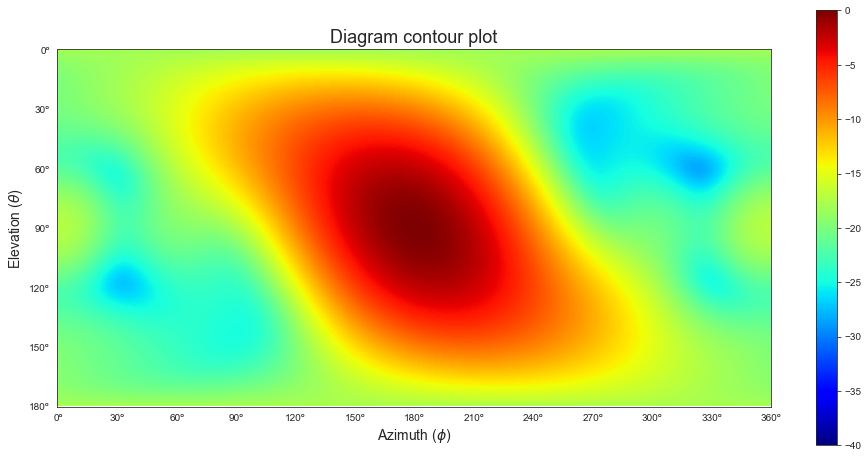

In [4]:
plotHM(eleData[:,:,0])

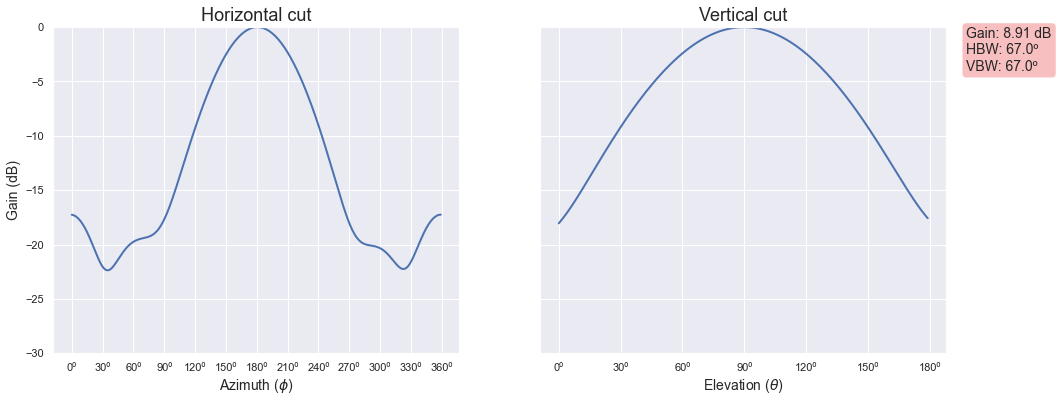

In [5]:
plotCuts(eleData[:,:,0], normalize=True)

[1∠0º @ [0 0 0.0], 1∠0º @ [0 0 0.2], 1∠0º @ [0 0 0.4], 1∠0º @ [0 0 0.6000000000000001], 1∠0º @ [0 0 0.8], 1∠0º @ [0 0 1.0], 1∠0º @ [0 0 1.2000000000000002], 1∠0º @ [0 0 1.4000000000000001]]
Array of 8 elements.


c:\Users\gvillalba\Anaconda3\envs\ds\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8736 (\N{ANGLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


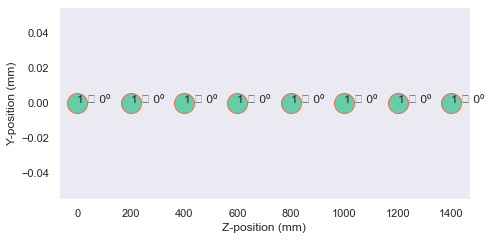

In [6]:
## Make ARRAY
amplitude = [1,1,1,1,1,1,1,1]
phaseProg = 0
phase = [phaseProg*i for i in range(8)]

sep = 0.20
xpos = [0 for i in range(8)]
ypos = [0 for i in range(8)]
zpos = [sep*i for i in range(8)]

#xpos = [0, sep, 2*sep, 3*sep, 0, sep, 2*sep, 3*sep]
#ypos = [0, 0, 0, 0, sep, sep, sep, sep]
#zpos = [0 for i in range(8)]
    
elements = element_array(xpos, ypos, zpos, amplitude, phase)
print(elements)

array1 = Array(elements)
print(array1)

# Plot array elements
array1.plot_array()

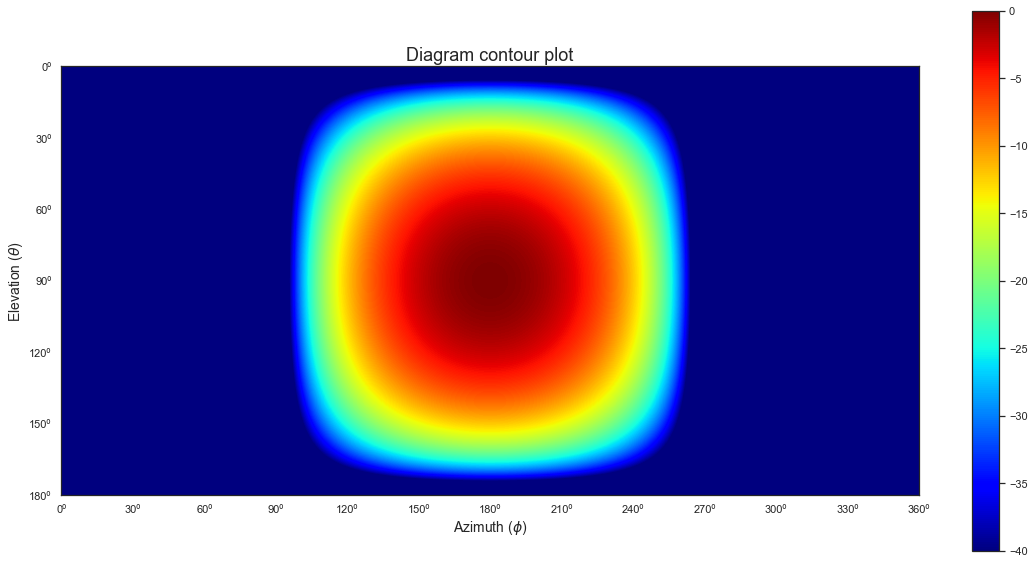

In [7]:
# Plot element pattern
plotHM(array1.elePattern)

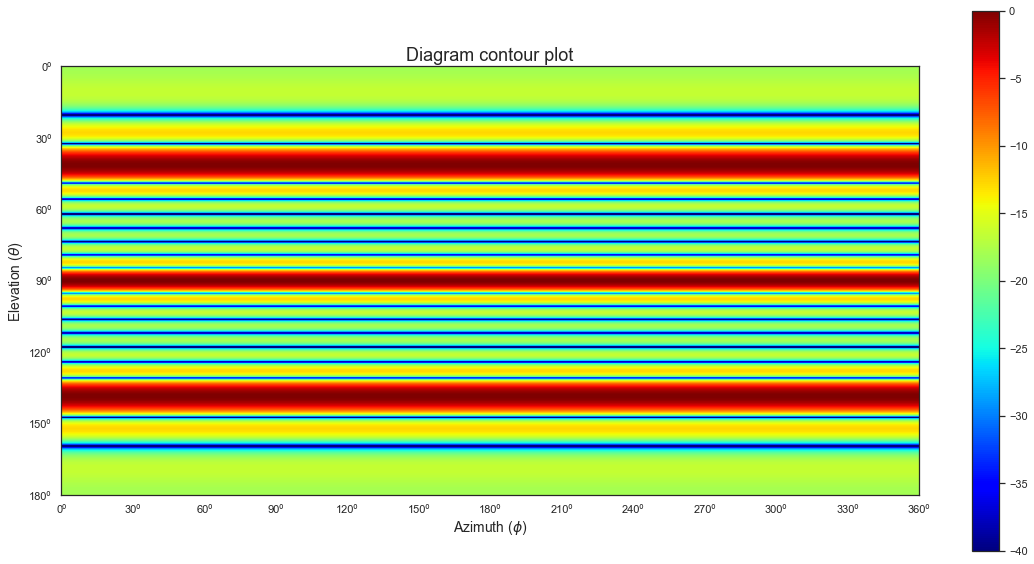

In [8]:
# Plot array factor
plotHM(array1.arrayFactor(2e9))

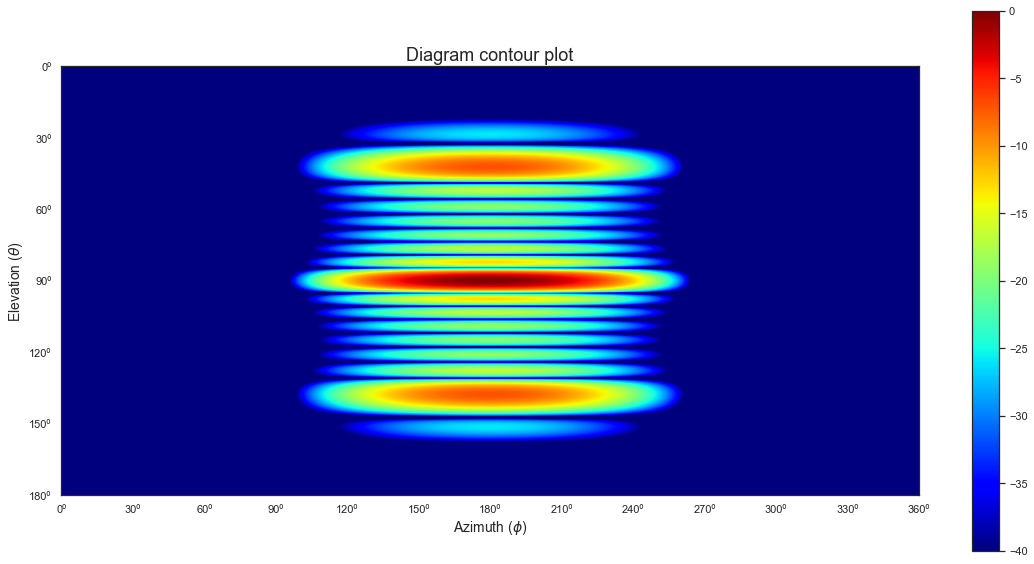

In [9]:
# Plot array pattern
plotHM(array1.arrayPattern(2e9))

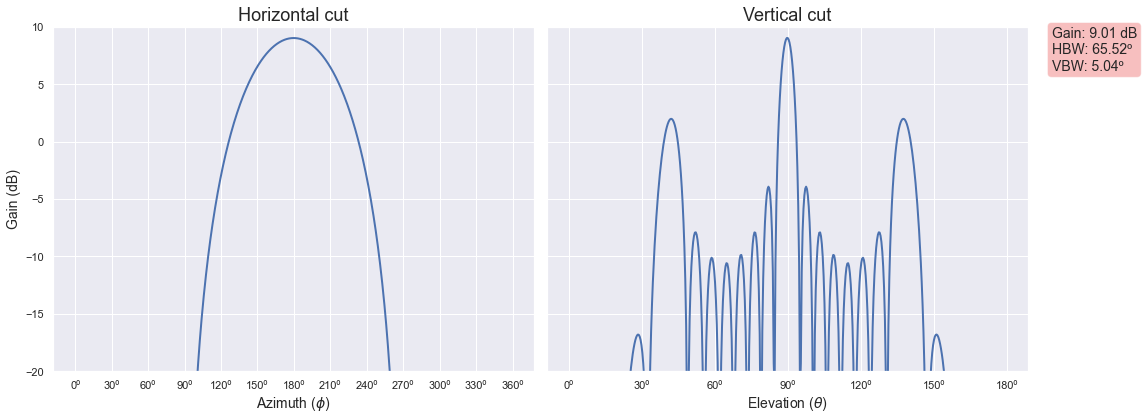

In [28]:
# Plot array pattern cuts
plotCuts(array1.arrayPattern(2e9), normalize=False)